# Chapter 4 모델훈련

앞장과 달리 이제는 실제 모델과 훈련 알고리즘이 어떻게 작동 하는지 살펴 볼 것입니다.

## 4.1 선형회귀
선형 회귀(linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다.

##### 선형 모델의 예측
![선형회귀](.\picture\regression_fomula.png)

• ŷ는 예측값

• n은 특성의 수 

• x<sub>i</sub>는 i번째 특성값

• θ<sub>j</sub>는 j번째 모델 파라미터

###### 선형 모델의 예측 벡터형태
![선형회귀벡터폼](.\picture\regression_formula_vector_form.png)

•θ는 편향 θ<sub>0</sub>과 θ<sub>1</sub>에서 θ<sub>n</sub>까지의 특성가중치를 담고 있는 모델의 파라미터

• θ<sup>T</sup> 는  θ의 전치(transpose)

• x는 x<sub>0</sub>에서 x<sub>n</sub>까지 담고있는 샘플의 특성벡터. x<sub>0</sub>는 항상 1이다.

• h<sub>θ</sub>는 모델 파라미터 θ를 사용한 가설함수이다.

•편의상 벡터 표현식 x의 성분 중 첫번째 x<sub>0</sub>는 1이라고 생각합니다.

##### 평균 제곱 오차(MSE) 비용함수
![MSE](.\picture\MSE.png)

• m은 선형모델을 훈련시킬 데이터 수 

• x<sup>i</sup>는 훈련시킬 데이터 중 i번째 벡터 (선형 모델 식의x<sub>1</sub>부터 x<sub>n</sub>를 벡터로 나타낸 것)

• y<sup>i</sup>는 i 번째 데이터의 실제 값 

• θ<sup>T</sup>*x<sup>(i)</sup> = $\hat{y}$ , 선형회귀에 i번 째 벡터 X를 넣으면 나오는 예측값.

• 모델을 훈련시킨다는 뜻은 모델이 훈련세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것

• 회귀에 널리 사용되는 성능 측정 지표는 평균 제곱근 오차(RMSE)이다. 

• 더 간단한  평균 제곱 오차(MSE)를 최소로 하는 θ를 찾는 것이 모델을 훈련한다는 뜻이다.

• MSE를 최소화하는 θ를 찾는 식이 있습니다.



### 4.1.1 정규방정식(The normal equation)
![정규방정식](.\picture\normal_equation.png)
MSE를 최소화하는 θ를 찾는 식

• $\hat{θ}$은 비용함수를 최소화 하는 θ값 입니다.

• y는 y<sup>(1)</sup>부터 y<sup>m</sup>까지 포함하는 타깃 벡터입니다.

#####  이 공식을 테스트 해보자

In [36]:
## 100개의 변수 생성
import numpy as np

X = 2*np.random.rand(100,1)  ## 100X1의 의 배열로 무작위 숫자를 생성 
y = 4+3*X+np.random.randn(100,1) ## 약간의 노이즈를 섞은 일차함수 
## rand는 rand 명령은 0부터 1사이에서 균일한 확률 분포로 실수 난수를 생성한다.
## randn은 정규확률분포(standard normal distribution)를 따르는 난수를 생성한다.

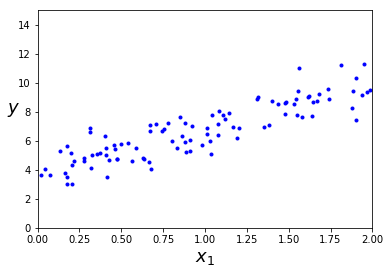

In [64]:
## 그래프로 x,y를 표시해보자
import matplotlib.pyplot as plt
plt.plot(X, y, "b.") 
plt.xlabel("$x_1$", fontsize=18) 
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [56]:
##최소값 θ를 구해보자
x_b = np.c_[np.ones((100,1)),X] ## 모든 샘플에 X0 = 1을 추가함
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) ## 정규방정식 코드구현

In [57]:
theta_best

array([[3.80162531],
       [3.04060515]])

실제 θ<sub>0</sub>= 4, θ<sub>1</sub>= 3을 기대했는데 노이즈 때문에 정확하게는 안 나옵니다.



In [65]:
## 훈련된 θ이용해서 예측을 해보자
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] ## 모든 샘플에 x0 = 1을 추가함
y_predict =  X_new_b.dot(theta_best) ## 훈련된 θ로 y를 예측하자
y_predict

array([[3.80162531],
       [9.8828356 ]])

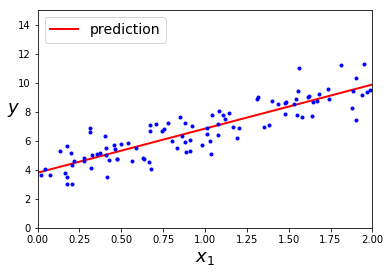

In [106]:
## 모델의 예측을 그래프로 나타내자
plt.plot(X_new, y_predict, "r-", linewidth=2, label = 'prediction') 
## 예측된 두개의 점을 빨간색 선으로 이어라 ,선의 굵기는 2 , 범례는 'prediction' 
plt.plot(X, y, "b.") ## X와 y에 해당 되는 점에 파란색 점을 직어라
plt.xlabel("$x_1$", fontsize=18) ## x축 밑에 이름은 x1으로 하고 size는 18
plt.ylabel("$y$", rotation=0, fontsize=18) 
## y축 왼쪽에 이름은 y로 하고 회전시키지 말고 글자크기는 18로 하라
plt.legend( loc="upper left", fontsize=14) ## prediction의 위치를 왼쪽 위로 하고 크기는 14
plt.axis([0, 2, 0, 15]) ## x축의 크기를 0에서2 , y축의 크기는 0에서 15
plt.show()

In [107]:
## 이 작업을 해주는 사이킷런의 코드가 있습니다.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() 
lin_reg.fit(X, y) 
lin_reg.intercept_, lin_reg.coef_
## lin)reg.intercept_는 θ0, lin_reg.coer는 θ1이다.

(array([3.80162531]), array([[3.04060515]]))

정규방정식의 값과 똑같이 나온다

## 4.2 경사 하강법(Gradient decent)

• 어떤 비용함수에서 파라미터를 계속 조정해서 최적의 파라미터를 찾는 방법

• 그래디언트를 감소시키다가 그래디언트가 0이 되는 곳을 찾는 것이다.

• 경사 하강법에서 중요한 파라미터(경사하강법의 파라미터이다)는 스텝의 크기 ,즉 학습률이다.

• 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 해야하고 학습률이 크면 최솟값을 건너 뛰게 됩니다.


#### 학습률이 너무 작을 때 
![작을 때](.\picture\learning_rate_low.png)

최솟값까지 도달하는데 시간이 너무 오래걸림

#### 학습률이 너무 클 때 
![클 때](.\picture\learning_rate_high.png)

최솟값으로 가지 않고 큰 값으로 발산할 가능성이 있습니다


![ㅇㅇ](.\picture\weakpoint.png)
이렇게 좋은 비용함수가 아닌 여러가지 특이한 모양이 있을 때 알고리즘이 왼쪽에서 시작하면 전역 최솟값(global minimum)보다 덜 좋은 지역 최솟값(local minimum)에 수렵합니다.

## Note.  MSE는 어디서 시작하든 전역 최솟값만 있기 때문에 신경쓸 필요가 없다

• 경사하강법을 사용할 때는 특성들의 스케일링이 같도록 만들어야 합니다.

• 그렇지 않으면 최솟값에 도달하는 시간이 오래 걸립니다.

• 따라서 전에 배웠던 사이킷런의 StandardScaler을 사용하여서 스케일링을 같게 만들자.

## 4.2.1 배치 경사 하강법


매 경사 하강법 스텝에서 전체 훈련세트 X에 대해 계산하는 하강법

#### θ<sub>j</sub>에 대한 MSE의 편도함수
![편도](.\picture\partial_derivative.png)

• θ<sub>j</sub>가 변할 때 비용함수가 얼마나 변하는지 나타내는 함수


#### 비용함수의 그래디언트 벡터 
![허으](.\picture\partial_derivative_vector.png)

• 모델 파라미터마다 편도함수를 성분으로 갖고 있는 벡터이다.

• 

#### 배치 경사하강법
![스텝](.\picture\step.png)

• $\eta$는 학습률 

• 그래디언트가 +면 다음 스텝의 θ는 내려야가야 하고 -면 반대로 올라가야 하므로 $\eta$앞에 -가 붙었다.

• 만약 많은 수의 트ㄱ성에서 선형회귀를 훈련시킨다면 정규방정식 보다 경사 하강법을 사용하는 편이 훨씬 빠릅니다.

In [117]:
eta = 0.1 # 학습률
n_iterations = 1000 ## 반복 횟수
m = 100
theta = np.random.randn(2,1) ## 정규분포 확률로 난수를 골라 2X1행렬에 넣어라
for iteration in range(n_iterations): 
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y) ## 그래디언트 벡터를 구하자
    theta = theta - eta * gradients ## 새로운 theta(파라미터)에 대입

In [116]:
theta

array([[3.80162531],
       [3.04060515]])

•최적의 학습률은 어떻게 찾을까?
답은 그리드탐색이다

•그리드 탐색에서 수렴하는데 오래 걸리는 모델을 막기위해 반복횟수를 지정해야 한다.

• 반복횟수를 크게 지정해 놓고 그래디언트 벡터 값이 어떤값(허용오차)보다 작아지면 경사 하강법이 최솟값에 도달한 것이므로 알고리즘을 중지하는 방식으로 반복횟수를 지정한다.

## 4.2.2 확률적 경사 하강법(stochastc gradient decent)

매 스텝마다 딱 한개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산해서 파라미터를 훈련시키는 방법

• 작은 데이터만 처리하기 때문에 배치 경사 하강법 보다 훨씬 빠르고 메모리가 적게 들어 큰 훈련세트도 훈련시킬 수 있습니다.

• 확률적 경사하강법은 지역 최솟값을 건너뛸 수 있도록 도와주므로 배치 경사하강법 보다 전역 최솟값을 찾을 가능성이 높습니다.

• 확률적이기 때문에 최솟값에 근접하지만 최솟값에 안착하지는 못할 것입니다.

• 학습이 딜레마를 해결하는 방법은 학습률을 점진적으로 감소시키는 것입니다.

In [121]:
theta_path_sgd = [] 
m = len(x_b)
np.random.seed(42)
m

100

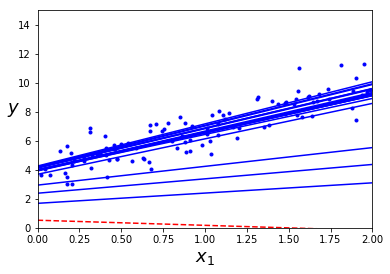

In [135]:
## 확률적 경사하강법 코드 구현
n_epochs = 50 ## 한 반복에서 m번 되풀이 되는데 , 이 때 한 번의 반복을 epoc라 한다.
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터(매 반복에서 학습률을 결정하는 파라미터)
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs): 
    for i in range(m):
        if epoch == 0 and i < 20 :         #첫 반복의 20까지 #책에는 빠짐
            y_predict = X_new_b.dot(theta)# 0과 2의 예측값 #책에는 빠짐
            style = "b-" if i > 0 else "r--" # 0이 아닐 때는 파란실선 0일 때는 빨간 점선 # 책에는 빠짐
            plt.plot(X_new, y_predict, style)# 그래프를 그려라 # 책에는 빠짐
        random_index = np.random.randint(m) ## 0부터 99사이의 값 중 하나를 랜덤으로 선택
        xi = x_b[random_index:random_index+1] ## 데이터 중 하나의 샘플을 선택
        yi = y[random_index:random_index+1] ## 선택한 샘플 데이터의 기댓값 선택
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) ## 하나의 샘플로만 그래디언트 계산
        eta = learning_schedule(epoch * m + i) ## epoc와 i가 감소 할 때마다 학습률 감소
        theta = theta - eta * gradients ## 새로운 세타를 대입
        theta_path_sgd.append(theta)    ## 리스트에 튜닝돼서 나오는 theta다 넣어라             # 책에는 빠짐

        ## 그래프의 원래 데이터들을 나타내자
plt.plot(X, y, "b.")                                 # 책에는 빠짐
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 빠짐
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 빠짐
plt.axis([0, 2, 0, 15])                              # 책에는 빠짐
                                                     # 책에는 빠짐
plt.show()                                           # 책에는 빠짐


• 랜덤으로 선택이 되므로 어떤 샘플은 선택되지 않을 수 있다. 

• 모든 샘플을 다 사용하게 하려면 훈련 세트를 섞고 하나씩 선택 후 다음 에포크에서 다시 섞어야 되는데 시간이 오래걸린다

In [234]:
from sklearn.linear_model import SGDRegressor
SGDRegressor?

In [146]:
## 사이킷런에 확률적 경사 하강법을 지원해준다 코드는 이렇다
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42) 
## 최대 반복이 50번, panalty는 없음, eta0는 처음 학습률을 뜻한다.
sgd_reg.fit(X, y.ravel()) ## y.ravel은 배열을 1차원 배열로 만들어주는 함수


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

## 4.2.3 미니배치 경사 하강법(Mini-batch Gradient Descent)


미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산하는 경사 하강법

• 확률적 경사하강법 보다 덜 불규칙하므로 최솟값에 더 가까이 도달하게 된다.

• 지역 최솟값에 빠져나오기 힘들지도 모른다.


선형 회귀를 사용한 알고리즘 비교
![ㅇㅇ](.\picture\table1.png)
![ss](.\picture\table2.png)

• 데이터의 갯수가 많으면 배치 경사하강법이 좋지 않다.

• 특성의 갯수(데이터의 벡터 차원)이 크다면 정규방정식은 좋지않다

• 외부 메모리 학습 지원이란 컴퓨터 한 대의 메인 메모리에 들어갈 수 없는 아주 큰 데이터셋을 학습하는 시스템에 온라인 학습 알고리즘을 사용하는 것이다.

• 확률적 경사 하강법과 미니배치 경사 하강법은 훈련할 때 전체 샘플 하나 혹은 작은 묶음으로 훈련을 하므로 외부 메모리 학습이 가능합니다.


## 4.3 다항 회귀( Polynomial Regression)

비선형 데이터를 학습하는데 특성의 거듭제곱을 새로운 특성으로 추가하고 추가한 데이터셋에 선형 모델을 훈련시키는 기법



In [152]:
## 약간의 노이즈가 있는 2차 함수를 따르는 데이터들을 만들자
m = 100
X = 6 * np.random.rand(m, 1)-3 ## - 3 -3부터 3 까지 랜덤하게 고르자
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  ##  y 값은 약간의 노이즈가 있는 2차 함수를 따른다.

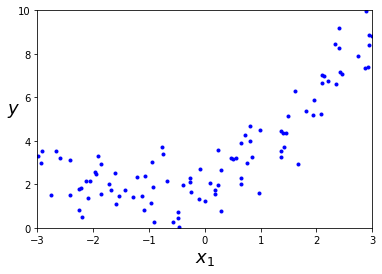

In [153]:
## x,y를 그래프에 나타내보자
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

• 직선을 따르지는 않는다. 

• 데이터의 제곱 값을 하나의 특성으로 추가하여 선형회귀를 하면 파라미터들을 훈련시킬 수 있다.

In [158]:
## 사이킷런의 PolynomieaFeatures로 데이터의 제곱값들을  특성에 추가한다.
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=2, include_bias=False)  
## degree=2 이면 제곱값들을 특성으로 추가 default는 2, include_bias는 x0=1을 추가할지 말지 경정, default 는 True
X_poly = poly_features.fit_transform(X) 
X_poly[0] ## X데이터의 특성에 제곱값이 추가 됐다.

array([2.1075118 , 4.44160599])

In [159]:
## 선형회귀로 훈련을 시키자
in_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
##  lin_reg.intercept_에는 bias(θ0)가 들어가고 lin_reg.coer_에는 특성과 특성의 제곱의 파라미터가 들어간다.

(array([2.09060416]), array([[1.00332088, 0.45237349]]))

• 절편은 2.0906, x제곱의 계수는 1.003, x의 계수는 0.45237로 예측하였다.

• 만약 특성의 갯수가 하나가 아니라 두개라면 PolynomialFEatures가 주어진 차수까지 특성간의 모든 교차항을 추가한다.

• 예를 들어 a와 b 두 개의 특성이 있고 차수가 2라면 a<sup>2</sup>과 b<sup>2</sup>뿐만 아니라 ab도 추가한다.


## 4.4 학습 곡선(learning curve)


얼마나 복잡한 모델을 사용할지 혹은 이 모델이 과대적합, 과소적합 되었는지 어떻게 알 수 있을까요?

• 교차 검증을 사용한다.

• 학습곡선을 살펴본다

학습 곡선은 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냅니다.

다음 코드는 학습곡선을 그리는 함수를 정의한 것입니다.

In [179]:
from sklearn.model_selection import train_test_split
train_test_split?

In [208]:
## 학습곡선을 그리는 함수를 정의하자
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):  
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=20)
    ## X와 y 각각에서 20%를 test set(validate set)으로 쓰고 나머지는 나머지는 train set으로 쓰겠다. 
    ## seeed는 10이다.
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])  ##  X의 train set의 1열에서 m열까지 모델에 훈련시켜라
        y_train_predict = model.predict(X_train[:m]) ## 변수에 train set의 m열까지의 예측값을 넣어라
        y_val_predict = model.predict(X_val) ## 변수에 test set(validatae set)의 예측값을 넣어라  
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) 
        # 리스트에 m열까지의 실제 값과 m열까지의 train set의 예측값의 에러를 넣어라
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        # 리스트에 validate set의 실제값과 예측값의 에러를 넣어라

    plt.plot(np.sqrt(train_errors), "r+-", linewidth=2, label='training')
    ## for문이 데이터 X의 크기에 따라서 돌아가므로 X축이 train set의 크기.y 값은 그에 따른 train set의 RMSE
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")
    ## X축은 똑같고 y 값은 test set(validate set)의 RMSE
    plt.legend(loc="upper right", fontsize=14)      
    plt.xlabel("size of train_set", fontsize=14)       
    plt.ylabel("RMSE", fontsize=14)              


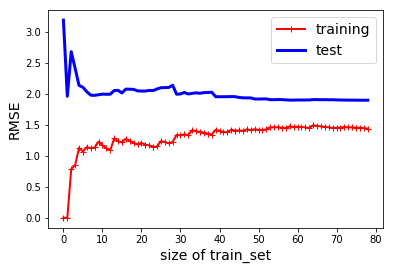

In [209]:
## 선형회귀의 학습곡선을 그려보자
lin_reg= LinearRegression()
plot_learning_curves(lin_reg,X,y)


• 비선형이기 때문에 훈련데이터에 완벽히 훈련될 수 없으므로 훈련데이터의 에러가 어느 정도에서 평평해진다

• 검증 데이터도 마찬가지로 훈련이 잘 되감에 따라 에러가 점점 감소하지만 훈련세트 아래로는 감소하지 않습니다.

• 과소적합의 예입니다. 좀 더 복잡한 모델을 사용하거나 특성을 바꾸어야 합니다. 


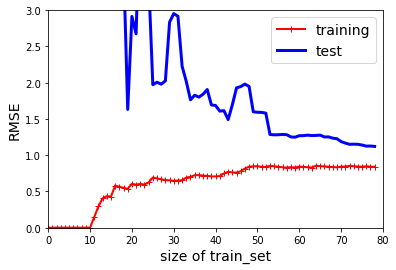

In [210]:
## 10차 다항회귀모델의 학습곡선을 그려보자
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ]) ## 10차로 만들어주는PolynomialFeatures와 LinearREgression을 한번에 해주는 파이프라인이다.

plot_learning_curves(polynomial_regression, X, y) 
plt.axis([0, 80, 0, 3])           # 책에는 빠짐  # 책에는 빠짐
plt.show()                        # 책에는 빠짐


• 훈련데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.

• 두 곡선 사이의 공간이 있다. 이말은 훈련 데이터에서의 성능이 훨씬 좋다는 얘기고 훈련 데이터 셋에 과대적합 되어 있다는 말입니다.

• 과대적합 되어 있을 때는 더 많은 훈련데이터를 추가해서 검증오차가 훈련 오차에 근접하도록 하여야 합니다.

## 4.5 규제가 있는 선형모델 



과대적합을 줄이기 위해서는 어떻게 해야할까요?

자유도를 줄이는 것입니다. 즉 모델을 제한하는 것이다.

예를 들어 다항 회귀 모델을 규제하는 방법은 다항식의 차수를 감소시키는 것이다.

선형 회귀에서는 모델의 가중치를 제한하여 규제를 가하는데 규제를 가하는 3가지 방법을 알아보자

## 4.5.1 릿지 회귀(또는 티호노프 규제)


• 규제가 추가된 선형회귀이다.

• 비용함수에 가중치 벡터의 l<sub>2</sub>norm의 제곱을 더해서 파라미터의 값을 규제한다.

• 테스트나 실제 값을 예측할 때의 성능지표에서는 추가된 항을 사용하지 않는다.

• 테스트에 사용되는 성능 지표는 실제와 가까워야 하기 때문이다.

#### 릿지 회귀의 비용함수
![dd](.\picture\redge_ftn.png)

• 가중치(파라미터)의 l<sub>2</sub>norm = sqrt(($\theta$<sub>1</sub>)<sup>2</sup> + ···+($\theta$<sub>n</sub>)<sup>2</sup>)

• $\alpha$가 0이면 선형회귀와 똑같고 $\alpha$가 크면 모든 파라미터가 0에 가까워지고 $\theta$<sub>0</sub>만 남아서 결국 데이터들의 편균을 지나는 수평선이 됩니다.

• 릿지 회귀는 입력특성의 스케일링에 민감하기 때문에 스케일을 맞추는 것이 중요, 규제가 있는 모델은 대부분 마찬가지이다.

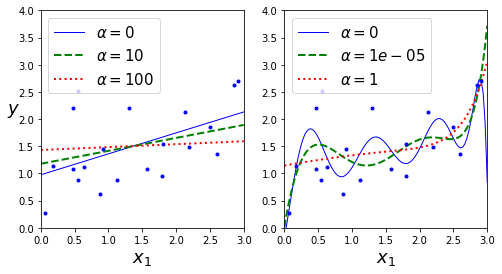

In [213]:
## 그래프 그리려고 있는 코드
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)


plt.show()

• 왼쪽 그래프는 릿지 회귀를 이용한 선형회귀로 $\alpha$가 커질 수록 수평선에 가까워 진다는 것을 알 수 있다.

• 오른쪽은 릿지 규제를 이용한 다항회귀로 $\alpha$가 커질 수록 파라미터가 감소하므로 직선에 가까워지는 것을 알 수 있다.

#### 릿지 회귀의 정규방정식
![ㅇㅇ](.\picture\ridge_normal.png)

In [217]:
## 릿지 회귀의 최적 파라미터를 릿지회귀의 정규방정식을 이용해 구gksms 코드
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
# alpha는 비용함수 뒷쪽의 파라미터를 조절하는 값.
# solver의 기본값은 auto. 희소행렬이나 singular matrix가 아닐 경우 cholesky가 된다.
# 숄레스키를 사용하면 성능이 좋다?
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [216]:
Ridge?

In [218]:
## 확률적 경사하강법을 사용해서 릿지 회귀의 최적 파라미터를 구해보자
sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel()) 
sgd_reg.predict([[1.5]])
## 선형회귀와 모든 것이 똑같은데 penalry만 다르다. 'ㅣ2'는 비용함수에ㅣ2 normd의 제곱 규제항을 추가하게 만든다.

array([1.13500145])

## 4.5.2 라쏘 회귀(Lasso Regression)


라쏘 회귀는 릿지회귀와 비슷하지만 비용함수의 규제를 l<sub>2</sub>norm 대신 l<sub>1</sub>norm을 사용한다.

• 파라미터(가중치)의 l<sub>1</sub> norm =  |$\theta$<sub>1</sub>| + ···+|$\theta$<sub>n</sub>|

#### 라쏘 회귀의 비용함수 

![ㅇㅇ](.\picture\rasso.png)

• 라쏘회귀의 특징은 덜 중요한 특성의 가중치(파라미터)를 완전히 제거하려고 한다는 점이다.

• 다시 말해 라쏘 회귀는 0이 아닌 가중치가 적은 희소 모델을 만듭니다.

• 라쏘의 비용함수는 $\theta$가 0일 때 미분이 가능하지 않다. 그래디언트 벡터 대신 서브 그래디언트 벡터를 사용한다

#### 서브그래디언트 벡터 
![ㅇㅇ](.\picture\subgradient.png)

배치경사하강법을 사용할 때 서브그래디언트 벡터를 사용하는 것이 아닐지? 생각된다

In [220]:
## 라쏘 회귀를 코드로 해보자
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) 
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## 4.5.3 엘라스틱넷(Elastic Net)

릿지 회귀와 라쏘 회귀를 절충한 모델이다. 
![ㅇㅁ](.\picture\elasticnet.png)
• r = 1이면 라쏘회귀이고 r = 0이면 릿지 회귀이다.

그렇다면 어떤것을 써야 할까?

• 특성이 몇 개 뿐이라면 라쏘나 엘라스틱넷이 낫다.(불필요한 가중치를 0으로 만들어 주기 때문)

• 특성 몇개가 강하게 연관되어 있을 때는 라쏘보다는 엘라스틱넷을 선호한다.

In [222]:
## 엘라스틱넷을 사이킷런으로 구현해보자
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
## ㅣ1_ratio가 엘라스틱넷식의 r값을 나타냅니다.
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 4.5.4 조기종료(Early Stopping)

검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 방법이다.


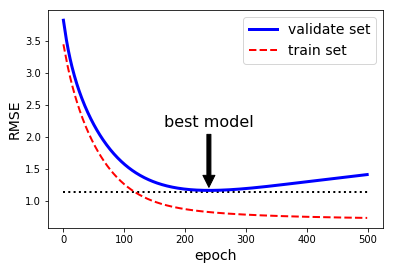

In [227]:
## 그래프 보려고 갖다쓴 코드
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validate set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="train set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

이 그래프는 배치 경사하강법으로 훈련시킨 복잡한 모델을 보여준다

그래프를 보면 검증 에러가 점점 감소하다가 다시 증가한다.

이 말은 모델이 훈련 데이터에 과대적합(overfitting)되기 시작했다는 말이다.

따라서 검증에러가 최솟값이 됏을 때 훈련을 멈추고 이 때의 파라미터를 쓰는 것을 조기종료라합니다.

확률적 경사하강법이나 미니배치 경사하강법은 곡선이 들쭉날쭉해서 최솟값을 찾기 어려울 수 있으나 검증 에러가 일정시간 동안 최솟값보다 내려가지 않을 때 최솟값일 때의 모델 파라미터로 돌린다.

In [240]:
## 조기종료를 코드로 구현해보자
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ]) ## 90제곱까지의 성분을 구하는 함수와 표준스케일링 파이프라인 구축

X_train_poly_scaled = poly_scaler.fit_transform(X_train) 
X_val_poly_scaled = poly_scaler.transform(X_val)

from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)
## warm_start = True면 fit 매서드가 호출될 때 이전 파라미터에서 훈련을 이어간다.
## learning_rate가 constant면 모든 eta는 eta0와 똑같음.
## penalty가 None이므로 규제는 없다.

minimum_val_error = float("inf") ## 플러스 무한대를 나타냄  
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # for문이 이어지면서 파라미터가 없어지지 않고 이어서 훈련함
    y_val_predict = sgd_reg.predict(X_val_poly_scaled) # 다항회귀 예측값
    val_error = mean_squared_error(y_val, y_val_predict) # MSE 에러값
    if val_error < minimum_val_error: 
        minimum_val_error = val_error 
        best_epoch = epoch
        best_model = clone(sgd_reg) 
        ## validate set의 에러값이 제일 작을 때의 에러값과 epoc 그리고 그 때의 훈련된 모델을 복사한다.
        

In [241]:
clone?

## 4.6 로지스틱 회귀(Logistic Regression)



어떤 회귀 알고리즘 들은 분류에서도 사용할 수 있는데 로지스틱 회귀는 그 중 하나입니다.

어떤 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용됩니다.



## 4.6.1 확률 추정

회귀모델과 같이 가중치 합을 계산하지만 바로 결과를 출력하지 않고 결과값의 로지스틱을 출력

로지스틱은 0과 1사이의 값을 출력하는 시그모이드 함수이다.

![시그모이드](.\picture\sigmoid.png)

로지스틱은 기호로 $\sigma$로 표시한다.

#### 시그모이드 함수 식과 그래프 
![ㅁㄴㅇㄹ](.\picture\equ_sigmoid.png)

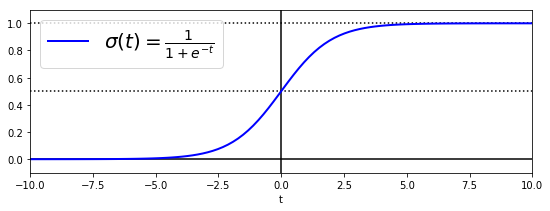

In [245]:
## 시그모이드 그래프를 나타내주는 코드
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

$\hat{p}$은 확률이고 이에 대한 예측 $\hat{y}$은 이렇게 구한다.
![ㄴㄴ](.\picture\prediction.png)
t가 양수일 때 0.5보다 크고 t가 음수일 때 0.5보다 작으므로

훈련된 모델이 양수일 때 1이라고 예측하고 훈련된 모델이 음수일 때 0이라고 예측한다.

## 4.6.2 훈련과 비용함수


훈련의 목적은 y= 1에 대해서는 높은 확률을 추정하고 y = 2에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것이므로 이렇게 비용함수를 정해보자
#### 하나의 식에대한 비용함수 
![ㅇㅇ](.\picture\logistic_error.png)

음성샘플(y = 0)일 때 확률을 0에 가깝게 추정하면 비용함수가 줄어들고 양성샘플(y = 1) 일 떄 확률을 1에 가깝게 추저정하면 비용함수가 줄어든다 

#### 로지스틱 회귀의 비용함수(로그손실)
![ㅇ](.\picture\logistic_ftn.png)

한 번에 최적값을 찾아주는 해는 없다. 전역 최솟값만 있는 볼록함수 이므로 경사 하강법을 써서 값을 찾자


#### 로지스틱 비용함수의 편도함수 
![ㅁㄴㅇㄹ](.\picture\partial_logistic.png)

경사하강법 쓰자!!

## 4.6.3 결정경계


로지스틱 회귀 설명을 위해 붓꽃  데이터셋을 사용하겠다.
이 데이터 셋을 3개의 품종에 속하는 붓꽃 150개의 꽃잎과 꽃받침의 너비와 길이를 담고 있다.

붓꽃의 종 중에 Iris-Versicolor종을 감지하는 분류기릘 만들어보자


In [248]:
## 붓꽃의 종 중에 Iris-Versicolor종을 감지하는 분류기릘 만들어보자
from sklearn import datasets
iris = datasets.load_iris() ## 붓꽃 데이터 셋이다.
list(iris.keys()) 

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [251]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [258]:
iris["target"]
## 0이면 IRis_Setosa, 1이면 Iris-Versicolor, 2이면 Iris Virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [253]:
X = iris["data"][:, 3:]  # 꽃잎 넓이
y = (iris["target"] == 2).astype(np.int)  # Iris-Virginica가 2이므로 Virginica이면 1 아니면 0

In [259]:
## 로지스틱 회귀 모델을 훈련시키자
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [293]:
LogisticRegression?


In [ ]:
log_reg.predict_proba?

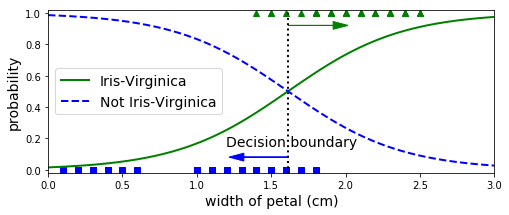

In [264]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) ## 0부터 3까지 동일한 간격으로 1000개 성분 만들고 11000X1 배열로 
y_proba = log_reg.predict_proba(X_new) 
## 새로운 데이터 X를 집어넣으면 각각의 데이터가 Iris-Virginica일 확률과 아닐 확률을 같은 행에 보여준다

## 그래프를 그리기 위한 것 
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("width of petal (cm)", fontsize=14)
plt.ylabel("probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [288]:
y_proba

array([[0.98552764, 0.01447236],
       [0.98541511, 0.01458489],
       [0.98530171, 0.01469829],
       ...,
       [0.02620686, 0.97379314],
       [0.02600703, 0.97399297],
       [0.02580868, 0.97419132]])

위 그래프에서 세모로 표시한 부분이 우리가 구하는 Iris-Verginica이고 밑에 있는 네모는 나머지 두개의 품종이다.

2cm 이상의 품종들은 무조건 Iris-Verginica이고 1cm 아래이면 무조건 아니다.

하지만 그 사이는 확신할 수 없다. 따라서 모두의 확률이 50%인 1.6cm에서 우리는 결정경게(decision boundary)가 형성될 것이다.

1.6cm보다 크면 Iris-Verginica라고 분류할 것이고 아니면 아니라고 분류 것이다.



In [289]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

1.7cm는 맞다고 1.5cm는 아니라고 함

## 4.6.4 소프트맥스 회귀

하나의 클래스에 대해서만 확률을 구하는 것이 아닌 2개 이상의 클래스에 대해서 속할 확률을 구해서 데이터를 분류할 수 있는 방법

#### x가 주어지면 각 클래스 k에 대한 점수를 계산
![ㅇ](.\picture\softmax_score.png)

#### 소프트 맥스 함수 확률 계산
![dd](.\picture\softmax_prob.png)

#### 소프트맥스 회귀 분류기의 예측 
![image.png](.\picture\softmax_prediction.png)
argmax는 함수를 최대화 하는 k값을 반환하는 함수

#### 크로스 엔트로피 비용함수
![image.png](.\picture\cross_entropy.png)
모델이 타깃 클래스에 대해서는 높은 확률을 다른 클래스에 대해서는 낮은 확률을 추정하도록 만드는 것이 목표

#### 클래스 k에 대한 크로스 엔트로피의 그래디언트 벡터
![image.png](.\picture\softmax_gradient.png)


꽃잎의 길이와 너비를 데이터로 세 품종 중에 어느 품종에 속할지에 대한 분류를 할 수 있는 모델을 훈련시켜보자

In [291]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

multi_class변수를 multinomial로 바꾸면 소프트 맥스 회귀를 사용할 수 있다.

solver는 lbfgs 같은 소프트맥스를 지원하는 알고리즘을 지정해야함


꽃잎의 길이가 5cm 길이가 2cm인 붓꽃이 어디있을지 훈련된 모델에 넣어보자

In [294]:
softmax_reg.predict([[5, 2]])

array([2])

3번째 클래스에 속해 있다고 말해줌


In [295]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

각 클래스에 속할 확률을 구해줌